In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path="./output_videos/cropped_player_0.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

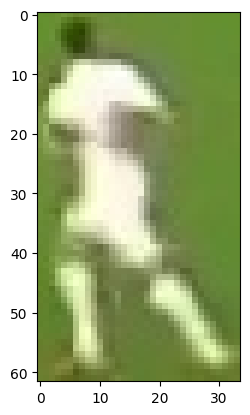

In [8]:
plt.imshow(image)
plt.show()

# Take top half of image

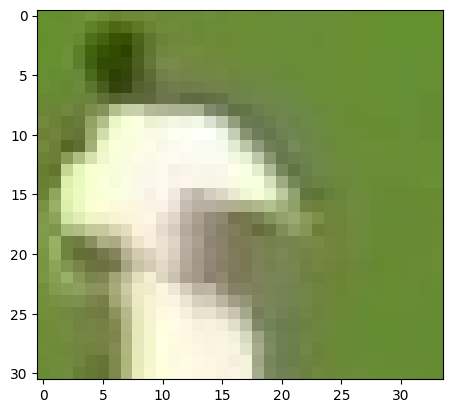

In [10]:
top_half=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

#Cluster image

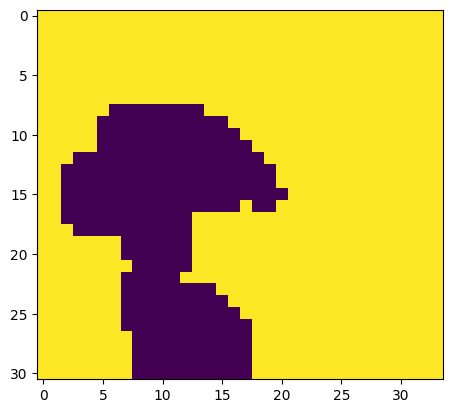

In [12]:
#Image -> 2d array
image_2d=top_half.reshape(-1,3)

#k-means with 2 clusters
k_means=KMeans(n_clusters=2,random_state=0).fit(image_2d)

#get clusters
labels=k_means.labels_

#reshape
clustered_image=labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_image)
plt.show()

In [23]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],
                 clustered_image[-1,0],clustered_image[-1,-1]]

non_player=max(set(corner_clusters),key=corner_clusters.count)
print("Non-player cluster:", non_player)

Non-player cluster: 1


In [24]:
player=1-non_player
print("Player cluster:", player)

Player cluster: 0


In [25]:
k_means.cluster_centers_[player]

array([231.75098814, 231.60869565, 204.37944664])